[View in Colaboratory](https://colab.research.google.com/github/Tsuyoshi-Morita/mysite/blob/master/job_YOLO_20180926ipynb.ipynb)

In [1]:
%%bash
mkdir -p /content/app
cd /content/app
git clone https://github.com/pjreddie/darknet
cd /content/app/darknet
make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

Cloning into 'darknet'...


In [0]:
%%bash
cd /content/app/darknet
wget -q https://pjreddie.com/media/files/yolov3.weights

In [7]:
%%bash
cd /content/app/darknet
wget https://petomorrow.jp/wordpress/wp-content/uploads/2017/12/754b7d41a31e9e215f5845541096e112.jpg -O test.jpg
./darknet detect cfg/yolov3.cfg yolov3.weights test.jpg

test.jpg: Predicted in 20.621420 seconds.
cat: 98%
cat: 55%
bird: 89%


--2018-09-26 11:37:19--  https://petomorrow.jp/wordpress/wp-content/uploads/2017/12/754b7d41a31e9e215f5845541096e112.jpg
Resolving petomorrow.jp (petomorrow.jp)... 110.232.194.35, 210.236.234.31
Connecting to petomorrow.jp (petomorrow.jp)|110.232.194.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174995 (171K) [image/jpeg]
Saving to: ‘test.jpg’

     0K .......... .......... .......... .......... .......... 29% 1.39M 0s
    50K .......... .......... .......... .......... .......... 58% 1.39M 0s
   100K .......... .......... .......... .......... .......... 87% 34.4M 0s
   150K .......... ..........                                 100% 90.9M=0.07s

2018-09-26 11:37:19 (2.32 MB/s) - ‘test.jpg’ saved [174995/174995]

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv 

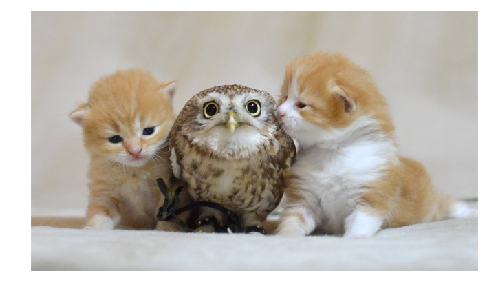

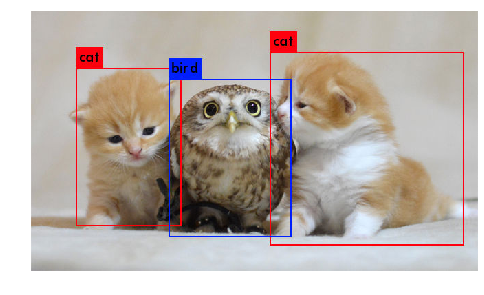

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # Python Image Library

src = Image.open('/content/app/darknet/test.jpg')
result = Image.open('/content/app/darknet/predictions.jpg')

plt.axis('off')
plt.imshow(np.asarray(src))
plt.show()

plt.axis('off')
plt.imshow(np.asarray(result))
plt.show()